The accepted shares are directly proportional to the reward recieved from each graphics cards computing power. Taking a look at this metric helps to identify performance differences based on the type of device, device settings, and potential hardware issues.

Enter file name: 
          Total Shares
GPU0        127.000000
GPU1        160.000000
GPU10       166.000000
GPU11       153.000000
GPU12       160.000000
GPU2        163.000000
GPU3        141.000000
GPU4        151.000000
GPU5        166.000000
GPU6        137.000000
GPU7        129.000000
GPU8        164.000000
GPU9        163.000000
All GPUs    152.307692


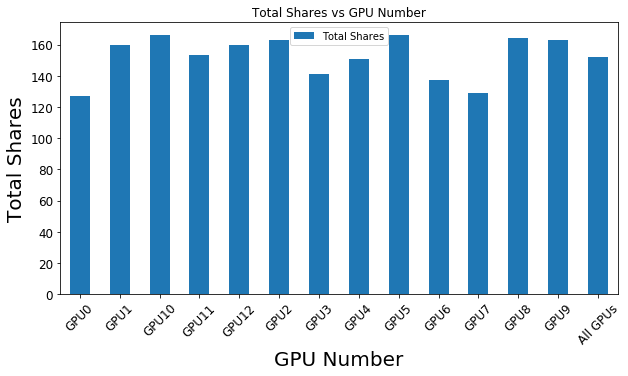

        Time   GPU  Accepted Shares  Hour  Minutes  Sec
0  11:41:11:  GPU5                1    11       41   11
1  11:41:17:  GPU2                1    11       41   17
2  11:41:21:  GPU4                1    11       41   21
3  11:41:25:  GPU0                1    11       41   25
4  11:41:28:  GPU2                1    11       41   28



          Mean Shares / Min
GPU0               2.152542
GPU1               2.711864
GPU10              2.813559
GPU11              2.593220
GPU12              2.711864
GPU2               2.762712
GPU3               2.389831
GPU4               2.559322
GPU5               2.813559
GPU6               2.322034
GPU7               2.186441
GPU8               2.779661
GPU9               2.762712
All GPUs           2.581486


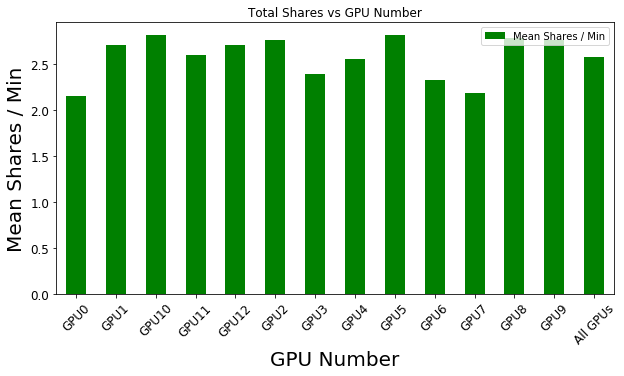

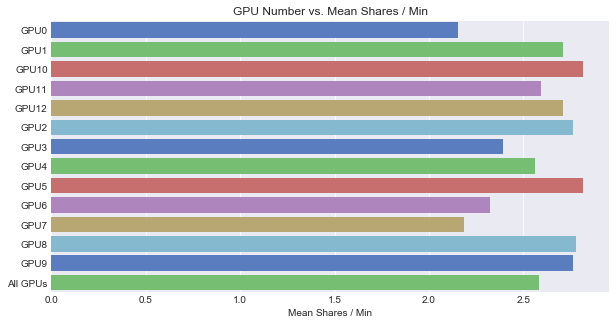

In [5]:
# Accepted Shares

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Prompt user for file input, catch with a defaut if statement
# Open file and isolate lines that start with INFO to make a list of lines returning the times 
# associated with each GPU and accepted share submitted.

fname = input('Enter file name: ')

if len(fname) < 1 : fname = "ewbf.log"
fh = open(fname)

d = dict()
d1 = dict()
d2 = dict()
lst = list()
lst1 = list()
lst2 = list()



for lines in fh:
    if not lines.startswith('INFO '): continue

# Having isolated the lines of interest, each string in the line is sliced to obtain the desired information


    x = lines.split(' ')    
    
    
    time = x[1]
    gpu_time = x[2]
    d[time] = gpu_time
    d1[time] = d1.get(time, 0) + 1
    
    shares = x[2]
    d2[shares] = d2.get(shares, 0) + 1
    
    
# Add keys and values from the dictionary to the empty list that has been created

for key in d:
    value = d[key]
    lst.append( (key, value) )

for key in d1:
        value = d1[key]
        lst1.append( (value) )
        

for key in d2:
    value = d2[key]
    lst2.append((key, value))
    

# Making any sense out of the data presented in the list is difficult due to is size and structure
# Create a pandas dataframe to organize the data

df_gpu = pd.DataFrame(lst)
df_gpu.columns = ['Time', 'GPU']
df_gpu.head()

df_shares = pd.DataFrame(lst1)
df_shares.columns = ['Accepted Shares']

df_all_shares = pd.concat([df_gpu, df_shares], axis =1)
df_all_shares.head()

df_shares = pd.DataFrame(lst2)
df_shares.columns = ['GPU Number', 'Accepted Shares']
df_shares = df_shares.sort_values('GPU Number')

df = pd.DataFrame.from_dict(d2, orient = 'index').sort_index()
df.columns = ['Total Shares']
df

meanshares = df_shares.mean(axis = 1)
meanshares = pd.DataFrame(meanshares)
meanshares.columns = ['All GPUs']


mean_shares_all = meanshares.mean()
mean_shares_all = pd.DataFrame(mean_shares_all)
mean_shares_all.columns = ['Total Shares']



df_mean_shares = df.append(mean_shares_all)
print(df_mean_shares)

df_mean_shares.plot(x = df_mean_shares.index.values, y = 'Total Shares', figsize=(10,5), kind = 'bar', rot = 45)
plt.title('Total Shares vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Total Shares', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()


# Shares are submitted at random times with the HH:MM:SS time format
# datetime module would be helpful
# Each string within the time column is sliced and set as an integer
# Integer values are appended to df using pandas concat function

df_hr = df_all_shares.Time.str.slice(-9, -7).astype(int)
df_min = df_all_shares.Time.str.slice(-6, -4).astype(int)
df_sec = df_all_shares.Time.str.slice(-3, -1).astype(int)

result = pd.concat([df_all_shares, df_hr, df_min, df_sec], axis=1)
result.columns = ['Time', 'GPU', 'Accepted Shares', 'Hour', 'Minutes', 'Sec']
print(result.head())
print(2*'\n')

shares_min = df / result['Minutes'].max().astype(float)
shares_min = pd.DataFrame(shares_min)
shares_min.columns = ['Mean Shares / Min']


meanshares = shares_min.mean()
meanshares = pd.DataFrame(meanshares)
meanshares.columns = ['Mean Shares / Min']
meanshares = meanshares.rename({'Mean Shares / Min': 'All GPUs'})
df_mean_shares = shares_min.append(meanshares)
print(df_mean_shares)

df_mean_shares.plot(x = df_mean_shares.index.values, y = 'Mean Shares / Min', figsize=(10,5), kind = 'bar', rot = 45, color = 'green')
plt.title('Total Shares vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Mean Shares / Min', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [10,5]
spm_bar = sns.barplot(y = df_mean_shares.index.values,
                       x = df_mean_shares['Mean Shares / Min'],
                       palette='muted')
plt.title('GPU Number vs. Mean Shares / Min')
plt.show()